In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori

In [10]:
df = pd.read_csv('Market_Basket_Optimisation.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.shape

(7501, 20)

In [12]:
df.isnull().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

In [13]:
df.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
dtype: object

In [14]:
df[0].value_counts()

mineral water        577
burgers              576
turkey               458
chocolate            391
frozen vegetables    373
                    ... 
cauliflower            1
ketchup                1
cream                  1
body spray             1
oatmeal                1
Name: 0, Length: 115, dtype: int64

Text(0.5, 1.0, 'MOST FREUENT ITEM')

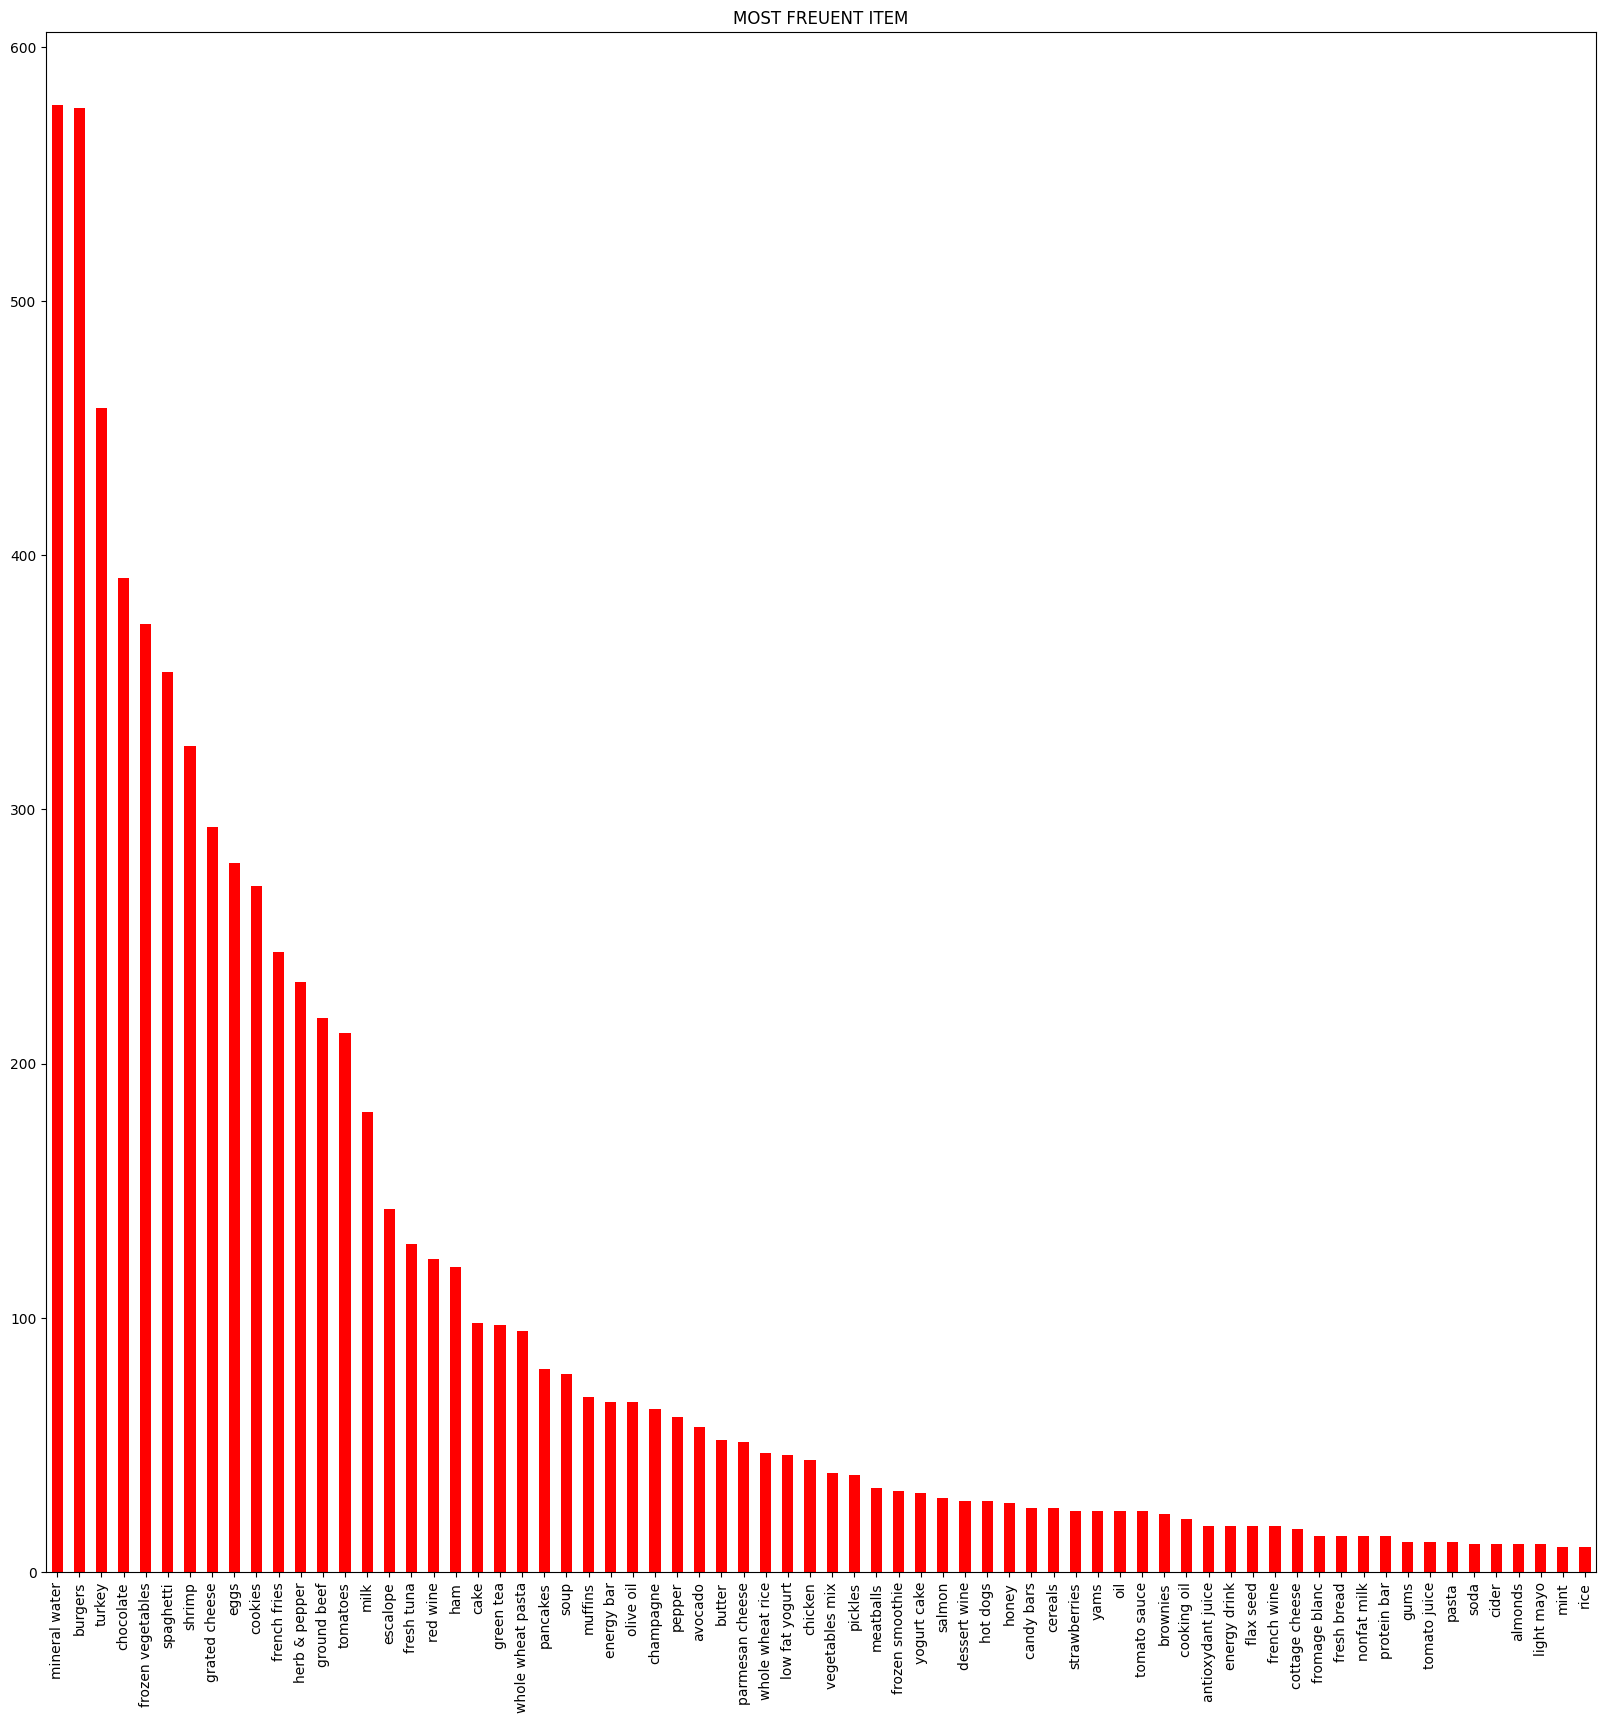

In [30]:
df[0].value_counts().head(70).plot.bar(color='red',figsize=(20,20))
plt.title("MOST FREUENT ITEM")

In [31]:
df.values.tolist()

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['chutney',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['turkey',
  'avocado',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['low fat yogurt',
  nan,
  n

In [40]:
l=df.shape[0]
col=df.shape[1]
data_list=[]
for i in range(0,l):
    temp=[]
    for j in range(0,col):
        if not (str(df.values[i][j])=='nan'):
            temp.append(str(df.values[i][j]))
    data_list.append(temp)
            

In [41]:
data_list

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [46]:
apr=apriori(data_list,min_confidence=0.3,min_support=0.02,min_length=2)
result=list(apr)
result

[RelationRecord(items=frozenset({'burgers', 'eggs'}), support=0.02879616051193174, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'eggs'}), confidence=0.33027522935779813, lift=1.8378297443715457)]),
 RelationRecord(items=frozenset({'mineral water', 'cake'}), support=0.027463004932675644, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cake'}), items_add=frozenset({'mineral water'}), confidence=0.33881578947368424, lift=1.4213966649005065)]),
 RelationRecord(items=frozenset({'chicken', 'mineral water'}), support=0.022796960405279298, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chicken'}), items_add=frozenset({'mineral water'}), confidence=0.38000000000000006, lift=1.5941722595078303)]),
 RelationRecord(items=frozenset({'chocolate', 'mineral water'}), support=0.05265964538061592, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chocolate'}), items_add=frozenset({'mineral water'}), confidence=0.321399511

In [47]:
list = []

In [48]:
for item in result:
    pair = item[0]
    items = [x for x in pair]
    list.append([str(items[0]+" -> " + items[1]),str(item[1]),str(item[2][0][2]),str(item[2][0][3])])
list

[['burgers -> eggs',
  '0.02879616051193174',
  '0.33027522935779813',
  '1.8378297443715457'],
 ['mineral water -> cake',
  '0.027463004932675644',
  '0.33881578947368424',
  '1.4213966649005065'],
 ['chicken -> mineral water',
  '0.022796960405279298',
  '0.38000000000000006',
  '1.5941722595078303'],
 ['chocolate -> mineral water',
  '0.05265964538061592',
  '0.3213995117982099',
  '1.3483320682317521'],
 ['mineral water -> cooking oil',
  '0.020130649246767097',
  '0.3942558746736292',
  '1.6539783646123563'],
 ['frozen smoothie -> mineral water',
  '0.020263964804692707',
  '0.32',
  '1.342460850111857'],
 ['frozen vegetables -> mineral water',
  '0.03572856952406346',
  '0.37482517482517486',
  '1.57246288387228'],
 ['ground beef -> mineral water',
  '0.040927876283162246',
  '0.41655359565807326',
  '1.7475215442008991'],
 ['ground beef -> spaghetti',
  '0.03919477403012932',
  '0.3989145183175034',
  '2.291162176033379'],
 ['low fat yogurt -> mineral water',
  '0.02399680042660

In [49]:
table = pd.DataFrame(list,columns=['Rule','Support','Confidence','Lift'])
table

,Rule,Support,Confidence,Lift
0,burgers -> eggs,0.02879616051193174,0.33027522935779813,1.8378297443715457
1,mineral water -> cake,0.027463004932675644,0.33881578947368424,1.4213966649005065
2,chicken -> mineral water,0.022796960405279298,0.38000000000000006,1.5941722595078303
3,chocolate -> mineral water,0.05265964538061592,0.3213995117982099,1.3483320682317521
4,mineral water -> cooking oil,0.020130649246767097,0.3942558746736292,1.6539783646123563
5,frozen smoothie -> mineral water,0.020263964804692707,0.32,1.342460850111857
6,frozen vegetables -> mineral water,0.03572856952406346,0.37482517482517486,1.57246288387228
7,ground beef -> mineral water,0.040927876283162246,0.41655359565807326,1.7475215442008991
8,ground beef -> spaghetti,0.03919477403012932,0.3989145183175034,2.291162176033379
9,low fat yogurt -> mineral water,0.023996800426609784,0.313588850174216,1.315564857470243


In [50]:
table.sort_values(by=['Support'],ascending=False)

,Rule,Support,Confidence,Lift
15,spaghetti -> mineral water,0.05972536995067324,0.3430321592649311,1.4390851379453289
3,chocolate -> mineral water,0.05265964538061592,0.3213995117982099,1.3483320682317521
10,milk -> mineral water,0.04799360085321957,0.3703703703703704,1.5537741320739085
7,ground beef -> mineral water,0.040927876283162246,0.41655359565807326,1.7475215442008991
8,ground beef -> spaghetti,0.03919477403012932,0.3989145183175034,2.291162176033379
6,frozen vegetables -> mineral water,0.03572856952406346,0.37482517482517486,1.57246288387228
12,pancakes -> mineral water,0.03372883615517931,0.3548387096774194,1.4886158620191963
0,burgers -> eggs,0.02879616051193174,0.33027522935779813,1.8378297443715457
11,olive oil -> mineral water,0.027596320490601255,0.4190283400809717,1.7579035676439423
1,mineral water -> cake,0.027463004932675644,0.33881578947368424,1.4213966649005065


In [54]:
pd.DataFrame(result)

,items,support,ordered_statistics
0,"(burgers, eggs)",0.028796,"[((burgers), (eggs), 0.33027522935779813, 1.83..."
1,"(mineral water, cake)",0.027463,"[((cake), (mineral water), 0.33881578947368424..."
2,"(chicken, mineral water)",0.022797,"[((chicken), (mineral water), 0.38000000000000..."
3,"(chocolate, mineral water)",0.052660,"[((chocolate), (mineral water), 0.321399511798..."
4,"(mineral water, cooking oil)",0.020131,"[((cooking oil), (mineral water), 0.3942558746..."
5,"(frozen smoothie, mineral water)",0.020264,"[((frozen smoothie), (mineral water), 0.32, 1...."
6,"(frozen vegetables, mineral water)",0.035729,"[((frozen vegetables), (mineral water), 0.3748..."
7,"(ground beef, mineral water)",0.040928,"[((ground beef), (mineral water), 0.4165535956..."
8,"(ground beef, spaghetti)",0.039195,"[((ground beef), (spaghetti), 0.39891451831750..."
9,"(low fat yogurt, mineral water)",0.023997,"[((low fat yogurt), (mineral water), 0.3135888..."
